<a href="https://colab.research.google.com/github/alji81/Kschool/blob/main/Datos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.54 µs


In [ ]:
df = pd.read_excel('2016_OK_2.xlsx', index_col=0)
pd.options.display.max_columns = None
df.head()

,Pressió atmosfèrica màxima,Pressió atmosfèrica mínima,Humitat relativa màxima,Velocitat del vent a 10 m (esc.),Direcció de vent 10 m (m. 1),Temperatura,Humitat relativa,Pressió atmosfèrica,Precipitació,Irradiància solar global,Temperatura màxima,Temperatura mínima,Humitat relativa mínima,Ratxa màxima del vent a 10 m,Direcció de la ratxa màxima del vent a 10 m,Precipitació màxima en 1 minut,PM10,ALERTA
FECHA,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,994.6,994.4,88,1.0,352,7.8,88,994.5,0.0,0.0,8.0,7.7,87,2.4,12,0.0,20,0
2016-01-01 01:00:00,994.3,994.1,83,2.3,355,9.9,80,994.2,0.0,0.0,10.3,9.4,78,4.2,350,0.0,20,0
2016-01-01 02:00:00,994.2,994.1,88,1.1,303,8.3,86,994.1,0.0,0.0,8.9,7.8,83,1.8,313,0.0,28,0
2016-01-01 03:00:00,994.0,993.7,93,1.2,275,6.7,92,993.9,0.0,0.0,7.3,6.4,89,2.0,283,0.0,20,0
2016-01-01 04:00:00,993.5,993.4,94,0.3,293,5.9,93,993.4,0.0,0.0,6.2,5.6,91,0.9,0,0.0,17,0


In [ ]:
df.shape

(8761, 18)

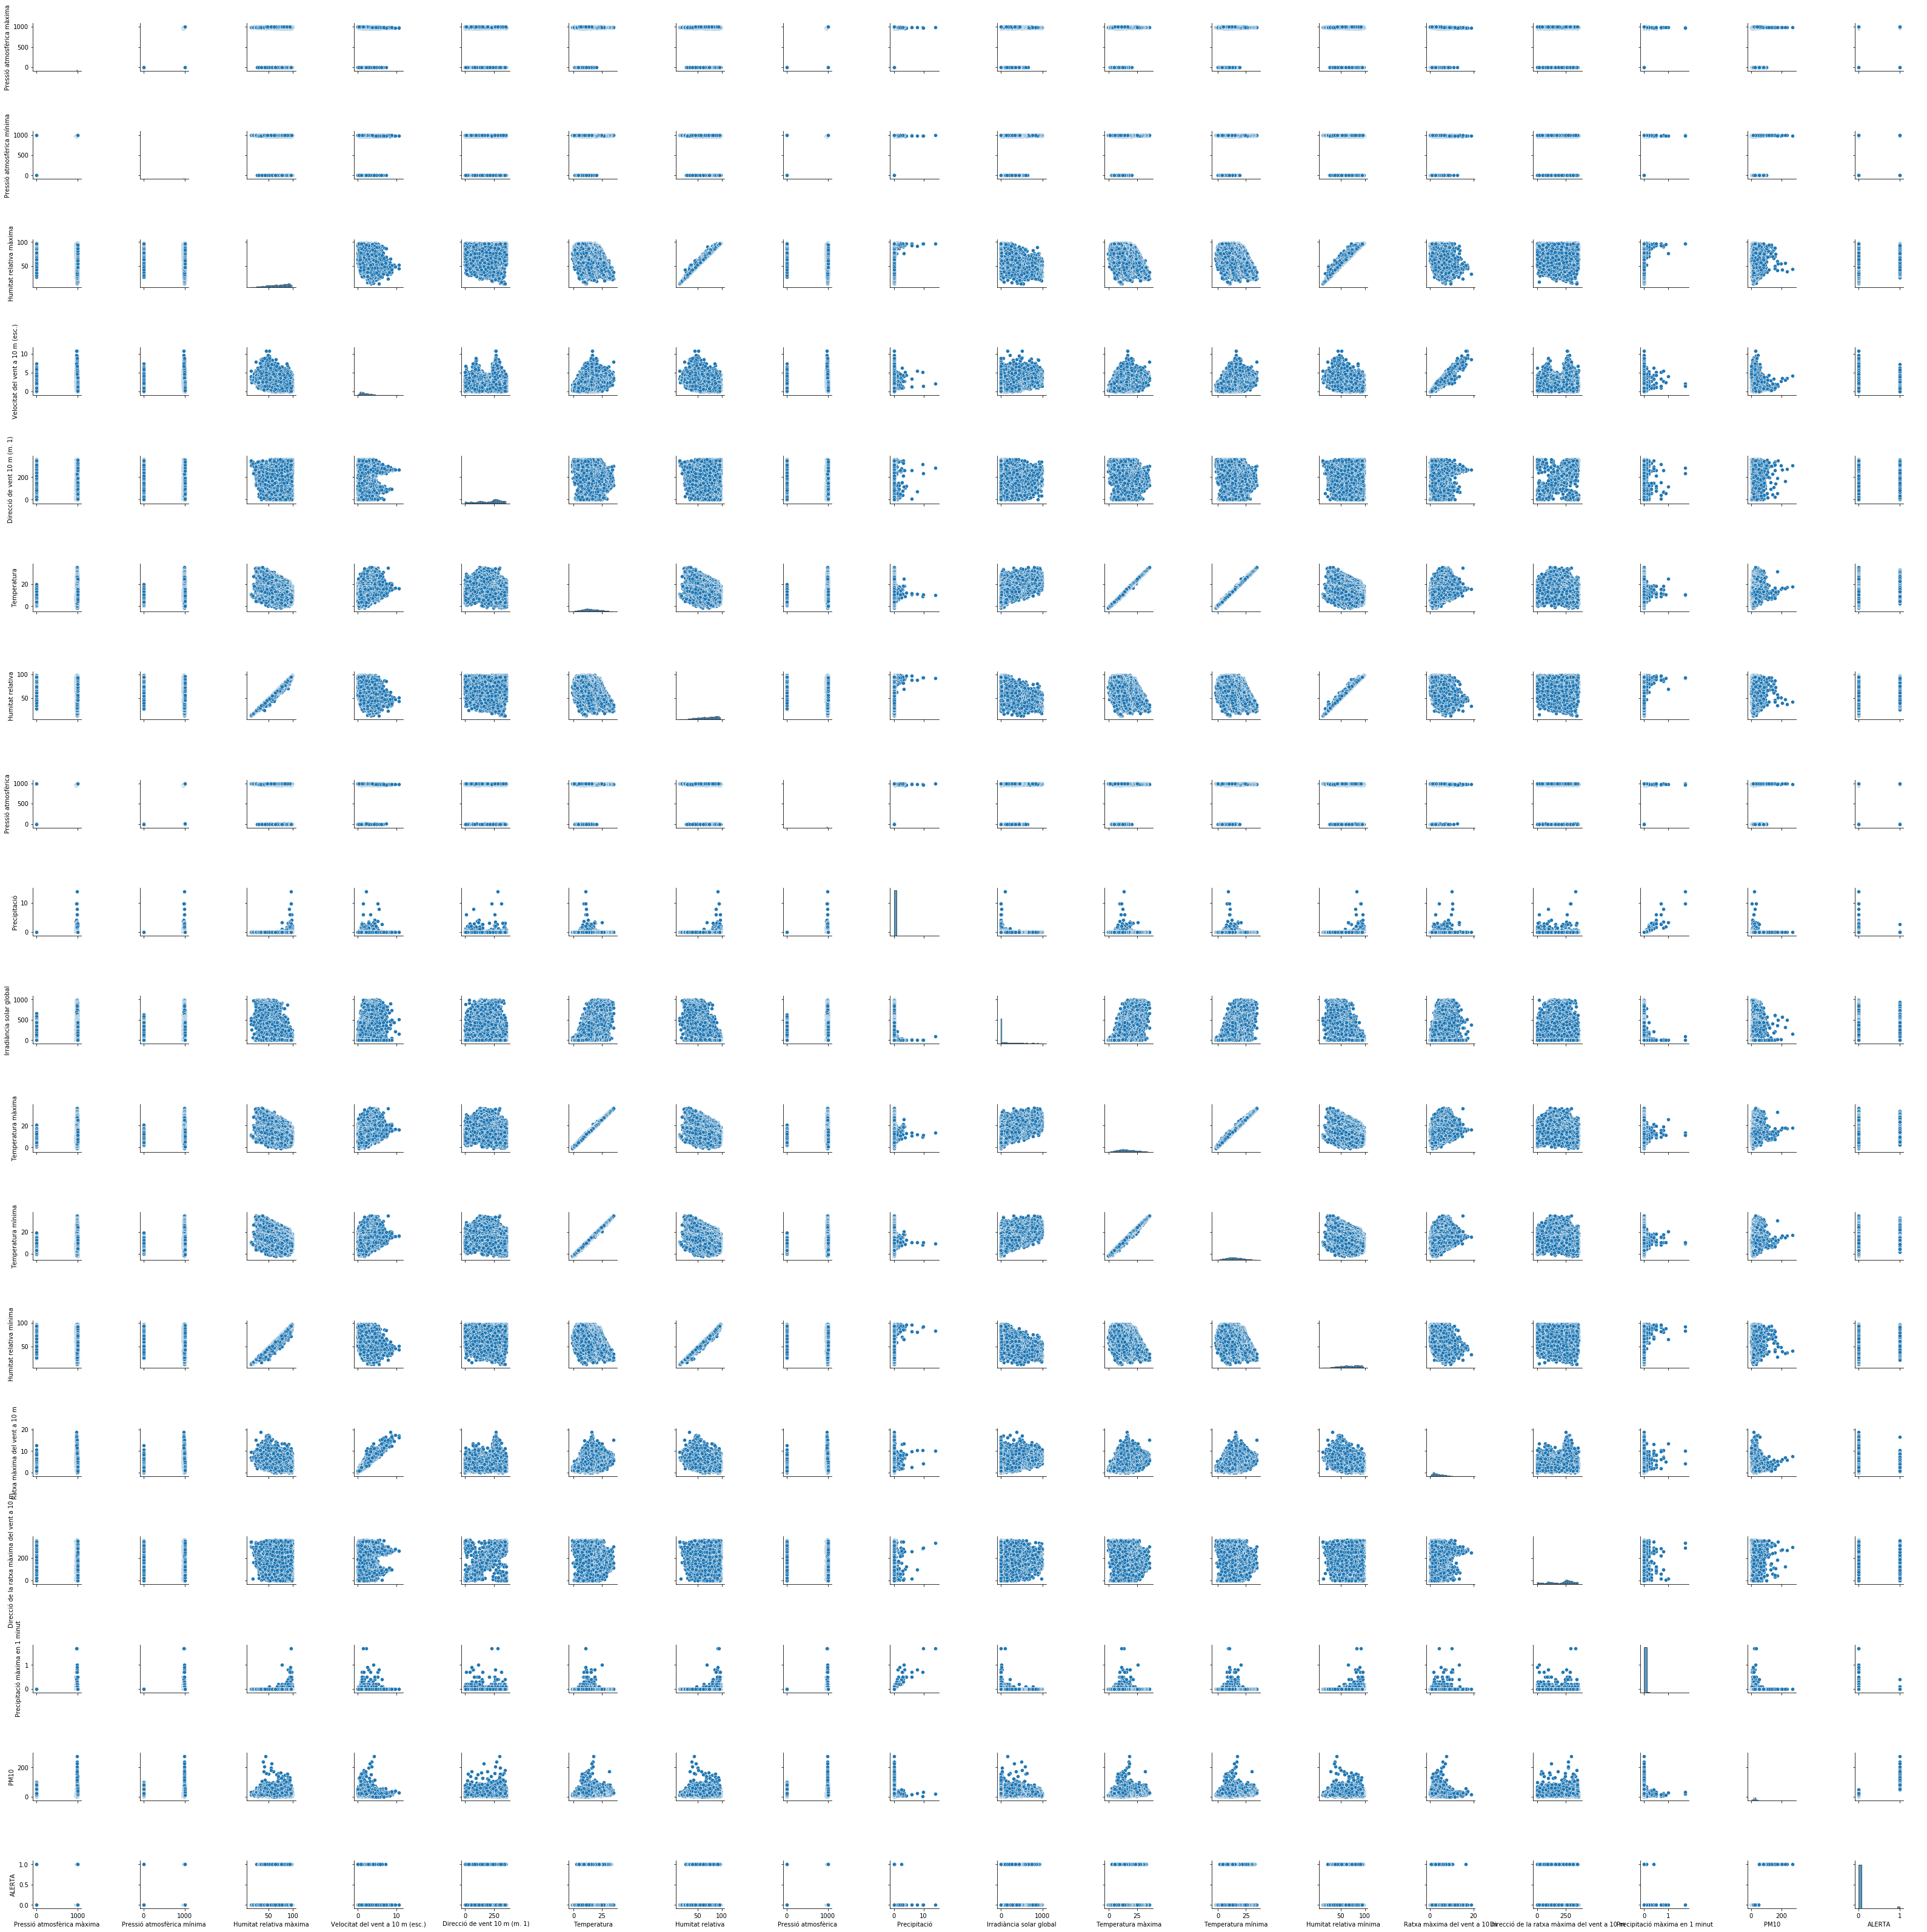

In [ ]:
sns.pairplot(df)

In [ ]:
target = df['ALERTA']
features = df.select_dtypes('number')
features = features[features.columns[:-1]]
features.isna().sum()

Pressió atmosfèrica màxima                     0
Pressió atmosfèrica mínima                     0
Humitat relativa màxima                        0
Velocitat del vent a 10 m (esc.)               0
Direcció de vent 10 m (m. 1)                   0
Temperatura                                    0
Humitat relativa                               0
Pressió atmosfèrica                            0
Precipitació                                   0
Irradiància solar global                       0
Temperatura màxima                             0
Temperatura mínima                             0
Humitat relativa mínima                        0
Ratxa màxima del vent a 10 m                   0
Direcció de la ratxa màxima del vent a 10 m    0
Precipitació màxima en 1 minut                 0
PM10                                           0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
preds = lr.predict(X_test)
f1_score(y_test, preds)

0.8383838383838383

In [ ]:
preds = lr.predict(X_test)
roc_auc_score(y_test, preds)

0.892841163310962